### ASSIGNENT BIKE-RENTAL MODEL

### INTRODUCTION 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- ### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- ### CONTENT 
1.  Data Analysis
       * Loading the dataset and libraries.
       * Data Loading and read csv file.
       * Typecasting the attributes
       * Missing value analysis
       * Drop the unused varaible
2. Attributes distributions and trends
       * Monthly distribution of counts
       * Yearly distribution of counts
       * Outliers analysis
       * EDA Analysis
3. Normality test
4. Correlation matrix 
5. Dummy creation for categorial variable(n-1) , drop_first=true avoid multicollinearity
6. Scaling feature
7. Split the dataset into train and test dataset

8. Feature selection  RFE(automatic),MANUAL(vif,p-value),MIXED
       * p-value>0.5 drop it
       * VIF>0.5 DROP IT (if very important to dataset then keep it)--manual feature selection
9. Model Validation Model 
10. Model Evaluation Metrics
       * R-squared score/Adjusted r2 score
       
11. Report the final model


### TASK-1  Data Analysis

- ### SUBTASK 1.1 Loading the dataset and libraries.

In [251]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- ### SUBTASK 1.2  Data Loading and read csv file.

In [252]:
#Loading the csv
bike =  pd.read_csv("Day.csv", index_col = 0)

In [253]:
# Check the number of rows and columns in the dataframe
#bike.shape
#or
print("The number of rows are ",bike.shape[0],"\n","The number of columns are",bike.shape[1])

The number of rows are  730 
 The number of columns are 15


In [254]:
# TOP 5 ROWS
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
# Description of data
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [256]:
# Numerical describe the data
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- ### Subtask:1.3  Typecasting the attributes

In [257]:
bike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [258]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [259]:
#Rename the columns
bike.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [260]:
#Type casting the datetime and numerical attributes to category

bike['datetime']=pd.to_datetime(bike.datetime)

bike['season']=bike.season.astype('category')
bike['year']=bike.year.astype('category')
bike['month']=bike.month.astype('category')
bike['holiday']=bike.holiday.astype('category')
bike['weekday']=bike.weekday.astype('category')
bike['workingday']=bike.workingday.astype('category')
bike['weather_condition']=bike.weather_condition.astype('category')

- ### Subtask:1.4 Missing value analysis
      

In [261]:
missing_value=bike.isnull().sum()#There is no null value in the dataframe

In [262]:
missing_value

datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

- ### Subtask:1.5 Drop the unused varaible

In [263]:
# Drop 'unsused variable' as we have created the dummies for it
bike.drop(['datetime','casual','registered'], axis = 1, inplace = True)

bike.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# NOTE:
Based on the high level analysis  the following variables can be removed from the data for further analysis -
Instant: It is only an index value
Datetime: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
Casual & registered: Both these columns contains the count of bike booked by different categories of customers.
From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

# TASK 2. Attributes distributions and trends


- ### SUBTASK: 
    * Monthly distribution of counts
    * Yearly distribution of counts
    * Outliers analysis
    * EDA Analysis

- ### Visualization of categorial and numerical variable

In [264]:
bike.describe()# Numerical distribution

,temp,atemp,humidity,windspeed,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [265]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [266]:
bike.groupby(["season"]).size()

season
1    180
2    184
3    188
4    178
dtype: int64

In [267]:
bike.groupby(["month"]).size()

month
1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64

- ### (A). VISUALIZATION OF CATEGORIAL VARIABLE

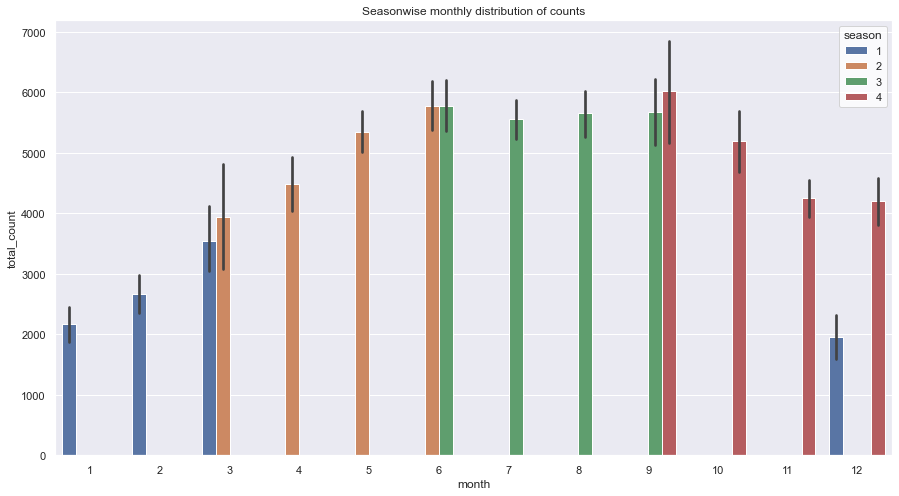

In [268]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=bike[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()


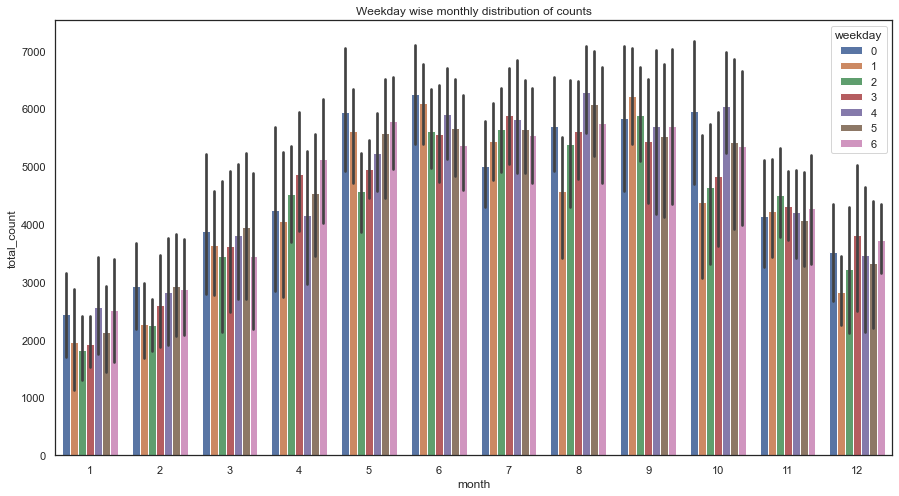

In [269]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=bike[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

- ### INSIGHT :
          * Monthly base bike sales are first started to incred then winter season it start decresed.
          * May to october high correlation vaue exist where bike have high demands.

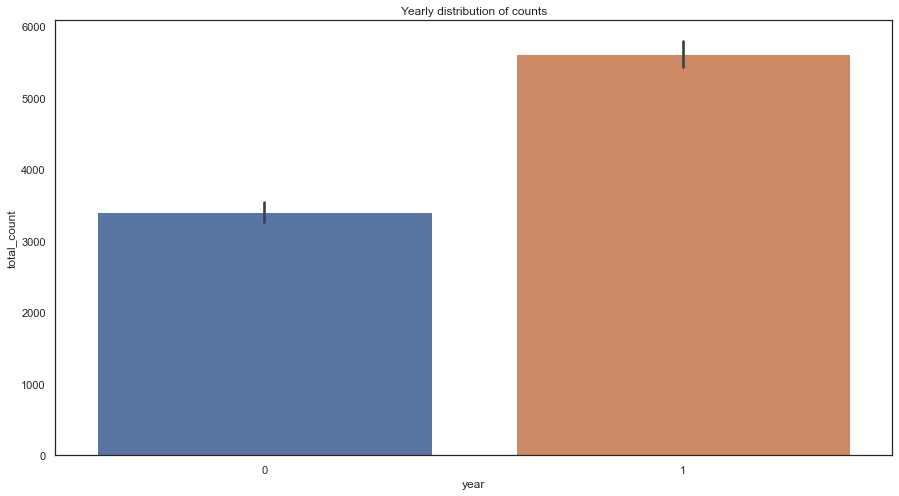

In [270]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x='year',y='total_count',data=bike[['year','total_count']],ax=ax2)
ax2.set_title('Yearly distribution of counts')
plt.show()

- ### year 2019 has higher correlation 

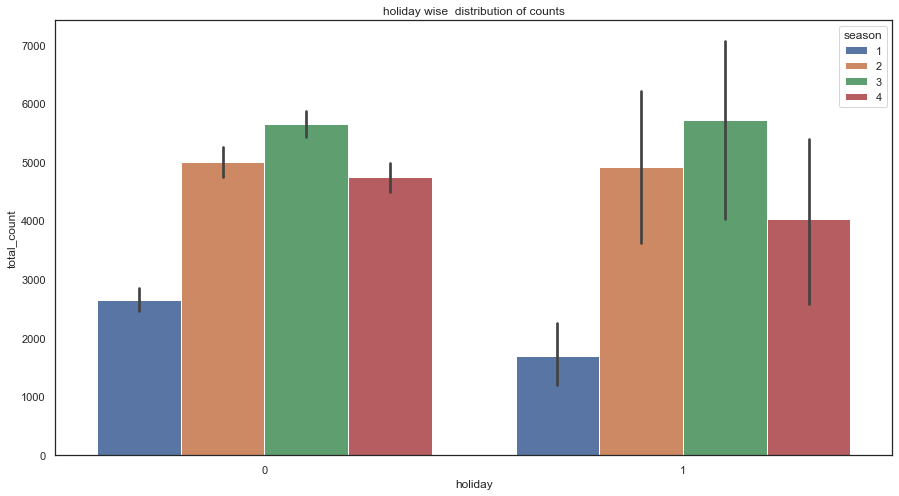

In [271]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax2=plt.subplots(figsize=(15,8))
sns.barplot(x='holiday',y='total_count',data=bike,hue ='season',ax=ax2)
ax2.set_title('holiday wise  distribution of counts')
plt.show()

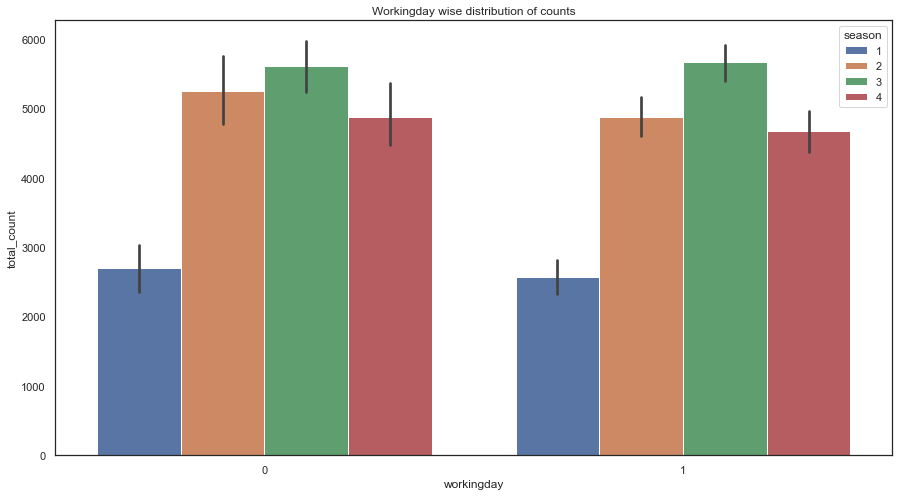

In [272]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

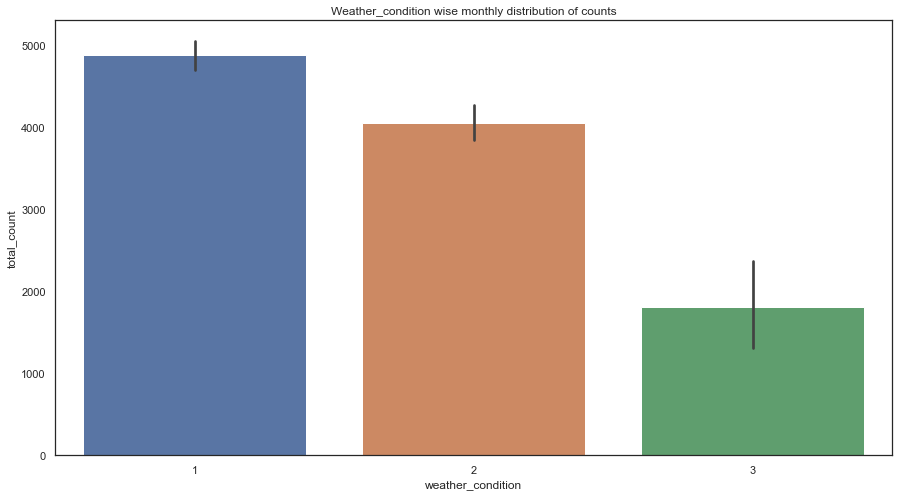

In [273]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

In [274]:
# Insight: Weather condition_1 (Light Snow, Mist Cloudy) is mostly preferrable condition for bike rental. 

- ### (B).VISUALIZATION OF NUMERICAL VARIABLE

# EDA Analysis and outlier analysis

In [275]:
#Lets first Define Function Univariate.
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


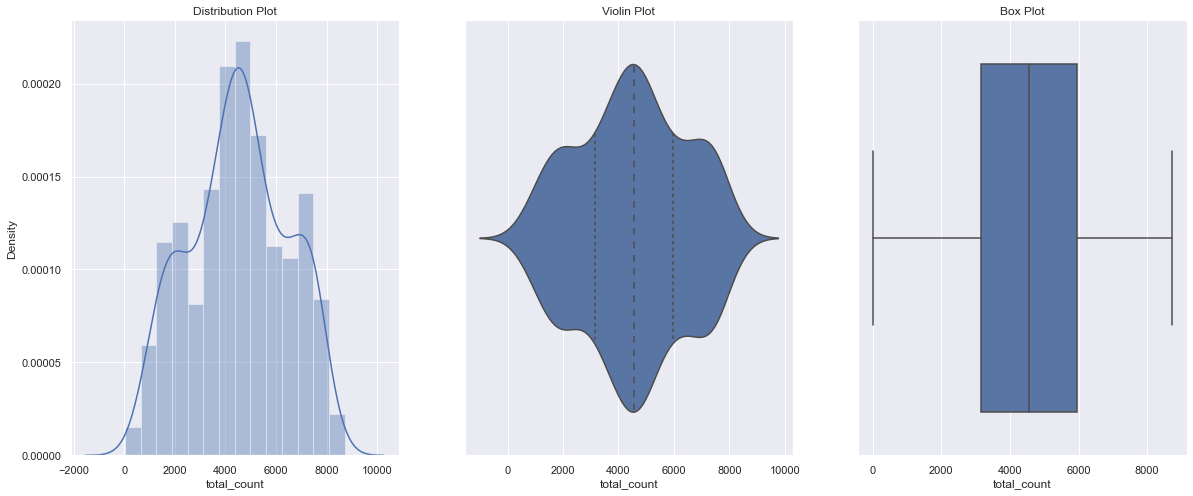

In [276]:
#Lets carry out Univariate analysis on total_count
univariate(df=bike,col='total_count')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


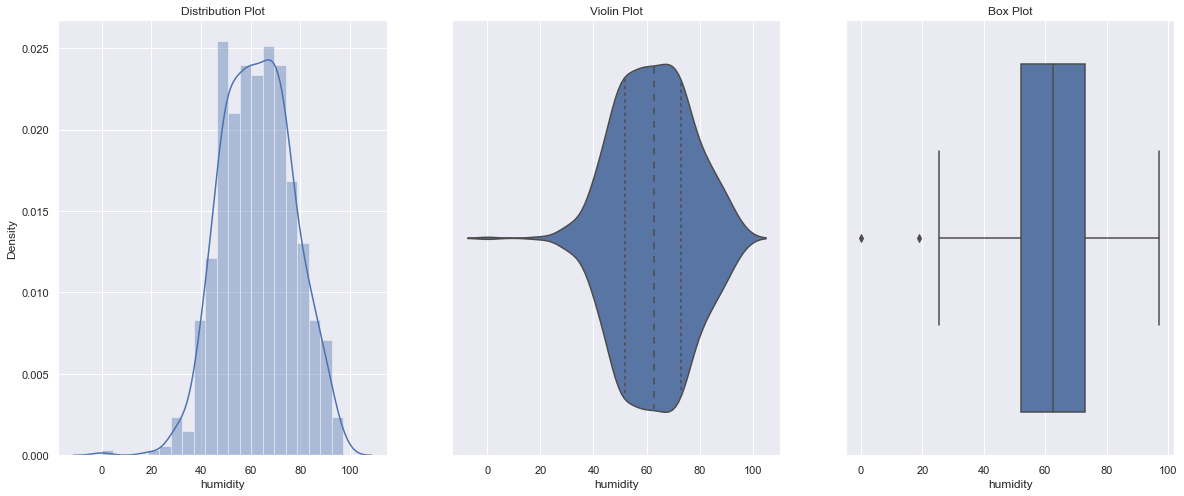

In [277]:
univariate(df=bike,col='humidity')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


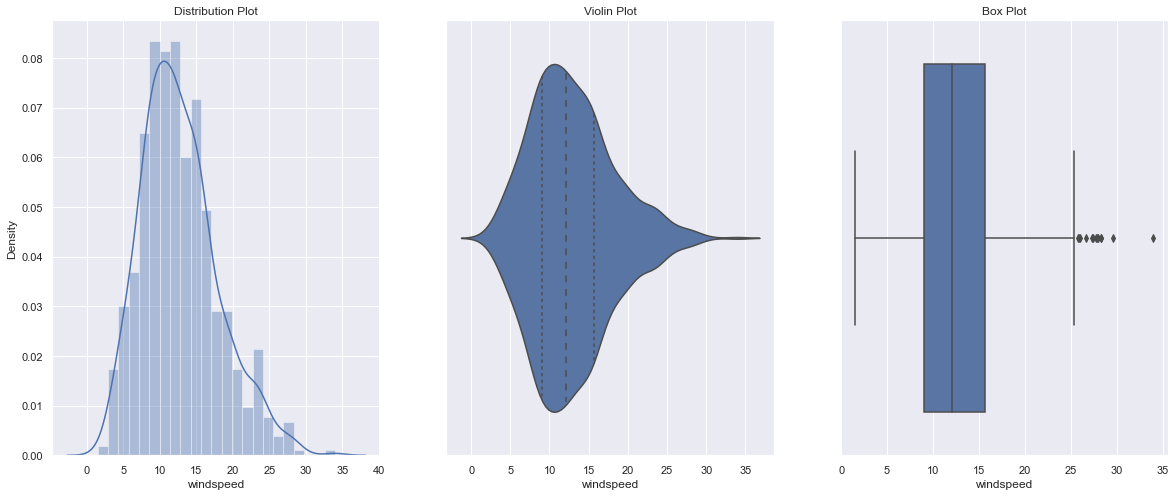

In [278]:
univariate(df=bike,col='windspeed')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


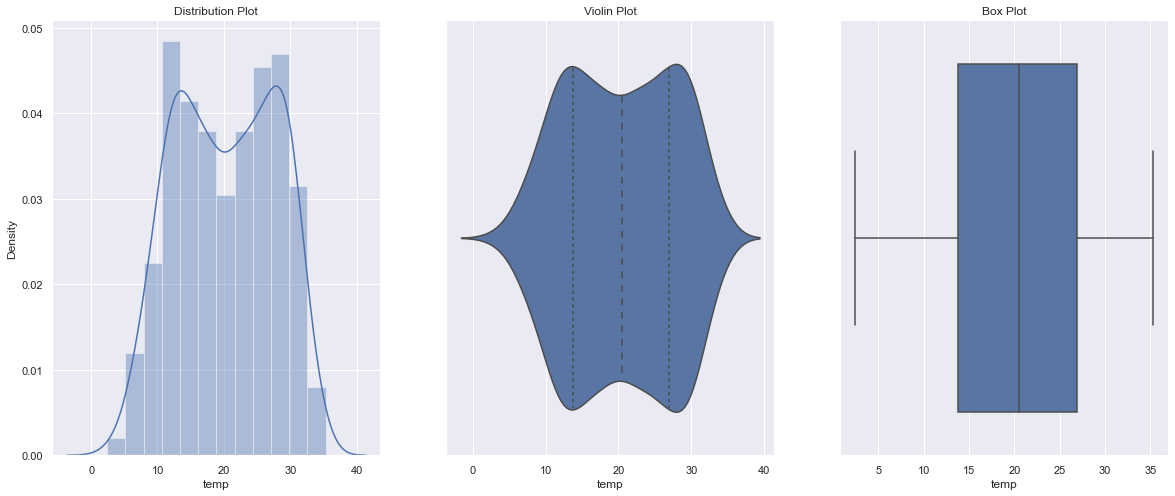

In [279]:
#Lets carry out Univariate analysis on temp
univariate(df=bike,col='temp')

In [280]:
# OUTLIERS ANAYLSIS
wind_hum=pd.DataFrame(bike,columns=['windspeed','humidity'])                     
cnames=['windspeed','humidity']       
 # outliers exist in windspeed,humidity .                     
for i in cnames:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())

In [281]:
#Replacing the imputated windspeed
bike['windspeed']=bike['windspeed'].replace(wind_hum['windspeed'])
#Replacing the imputated humidity
bike['humidity']=bike['humidity'].replace(wind_hum['humidity'])
bike.head(5)

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- ### Q.) From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
                                                                                                                                Answer : Observations from above boxplots for categorical variables:
                                                                                                                                The year box plots indicates that more bikes are rent during 2019.
                                                                                                                                The season box plots indicates that more bikes are rent during fall season.
                                                                                                                                The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
                                                                                                                                The month box plots indicates that more bikes are rent during september month.
                                                                                                                                The weekday box plots indicates that more bikes are rent during saturday.
                                                                                                                                The weathercondition box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

# TASK 3. Normal probability plot:
Is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit.

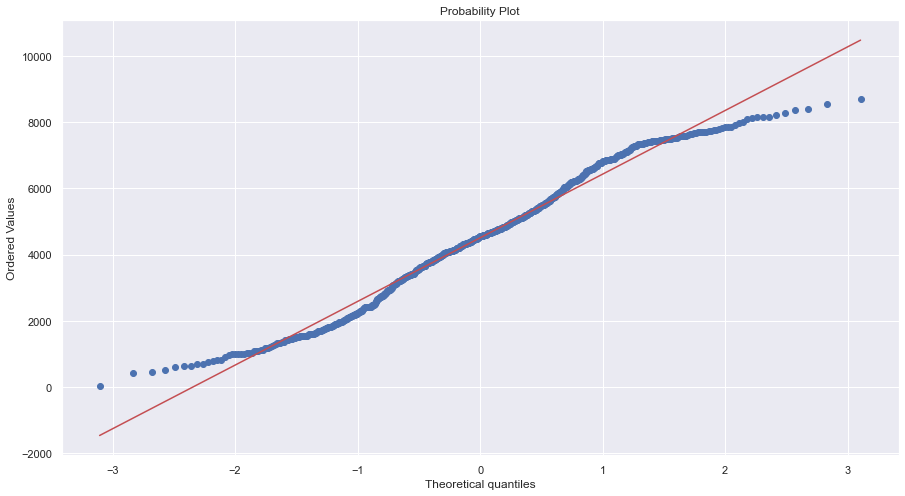

In [282]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike.total_count.tolist(),dist='norm',plot=plt)
plt.show()

# TASK 4. Correlation matrix

In [283]:
bike.corr()

,temp,atemp,humidity,windspeed,total_count
temp,1.000000,0.991696,0.107044,-0.158186,0.627044
atemp,0.991696,1.000000,0.118693,-0.183876,0.630685
humidity,0.107044,0.118693,1.000000,-0.262044,-0.079578
windspeed,-0.158186,-0.183876,-0.262044,1.000000,-0.235132
total_count,0.627044,0.630685,-0.079578,-0.235132,1.000000


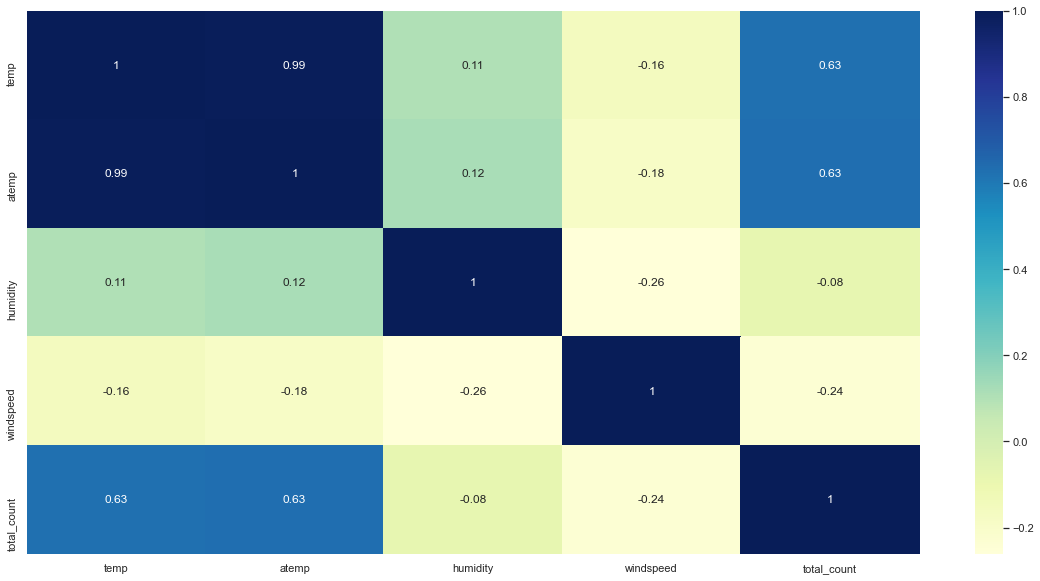

In [284]:
plt.figure(figsize = (20,10))  
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [285]:
# High correlation we found in temp,humidity,windspeed,total_count let we check briefly.

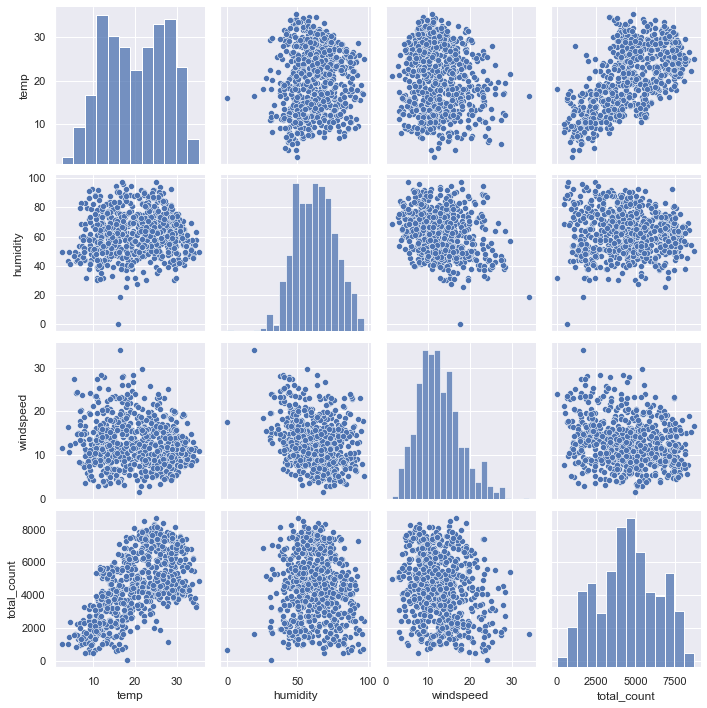

In [286]:
sns.pairplot(bike[['temp','humidity','windspeed','total_count']])
plt.show()

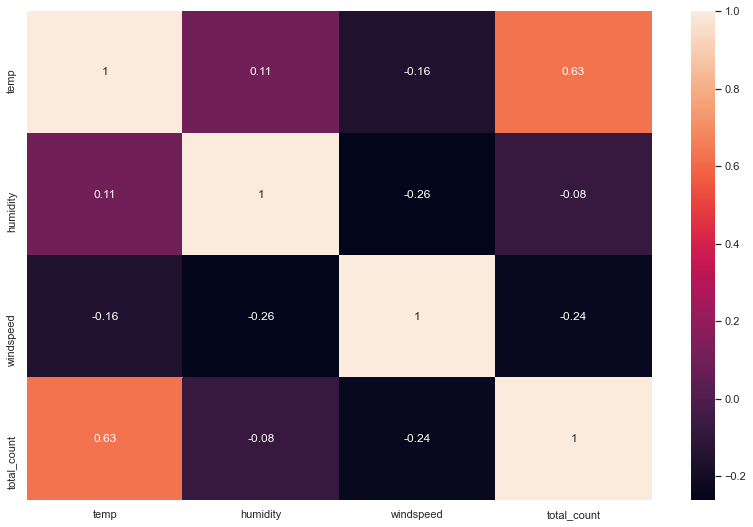

In [287]:
corr_df= bike[['temp','humidity','windspeed','total_count']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

- ### Q.) Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
Ans.) By looking at the pair plot temp variable has the highest (0.63) correlation with target variable 'total_count'.

# Task 5. Dummy creation for categorial variable(n-1) , drop_first=true avoid multicollinearity
       

In [288]:
# There is dummy variable distributions.
bike=pd.get_dummies(data=bike, columns=['season', 'month','year','weekday','weather_condition'], drop_first = True)

In [289]:
bike.head()

,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_12,year_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [290]:
bike.shape

(730, 30)

# TASK 6. Scaling feature and Split the dataset into train and test dataset

- ### Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

        Min-Max scaling
        Standardisation (mean-0, sigma-1)
        This time, we will use Standardisation .

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(219, 30)


In [292]:
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_12,year_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
instant,,,,,,,,,,,,,,,,,,,,,
654,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,...,0,1,0,0,1,0,0,0,0,0
577,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,...,0,1,0,0,1,0,0,0,0,0
427,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,...,0,1,0,0,0,0,0,0,1,0
729,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,0,...,1,1,1,0,0,0,0,0,0,0
483,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [293]:
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_12,year_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
instant,,,,,,,,,,,,,,,,,,,,,
185,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,...,0,0,0,0,1,0,0,0,1,0
536,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,...,0,1,0,0,0,1,0,0,0,0
300,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,1,0
222,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,...,0,0,0,0,0,0,1,0,0,0
153,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [294]:
scaler = StandardScaler()

In [295]:
#We can apply scaller to all columns except dummy variables
scale_columns=['total_count','temp','humidity','windspeed']
bike_train[scale_columns] = scaler.fit_transform(bike_train[scale_columns])

<ipython-input-295-a3eb43ba4f9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[scale_columns] = scaler.fit_transform(bike_train[scale_columns])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [296]:
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,...,month_12,year_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
instant,,,,,,,,,,,,,,,,,,,,,
654,0,1,-0.121335,23.0423,-0.474364,-0.117752,1.562685,0,0,1,...,0,1,0,0,1,0,0,0,0,0
577,0,1,1.231731,33.1448,0.542840,-0.330615,1.399629,0,1,0,...,0,1,0,0,1,0,0,0,0,0
427,0,0,-0.420478,20.6746,-0.035513,-0.385694,-0.215554,0,0,0,...,0,1,0,0,0,0,0,0,1,0
729,0,1,-1.294913,11.5850,-0.997494,2.018143,-1.379511,0,0,0,...,1,1,1,0,0,0,0,0,0,0
483,0,0,-0.627580,18.8752,-0.953900,-0.779889,-0.136589,1,0,0,...,0,1,0,0,0,0,0,0,1,0


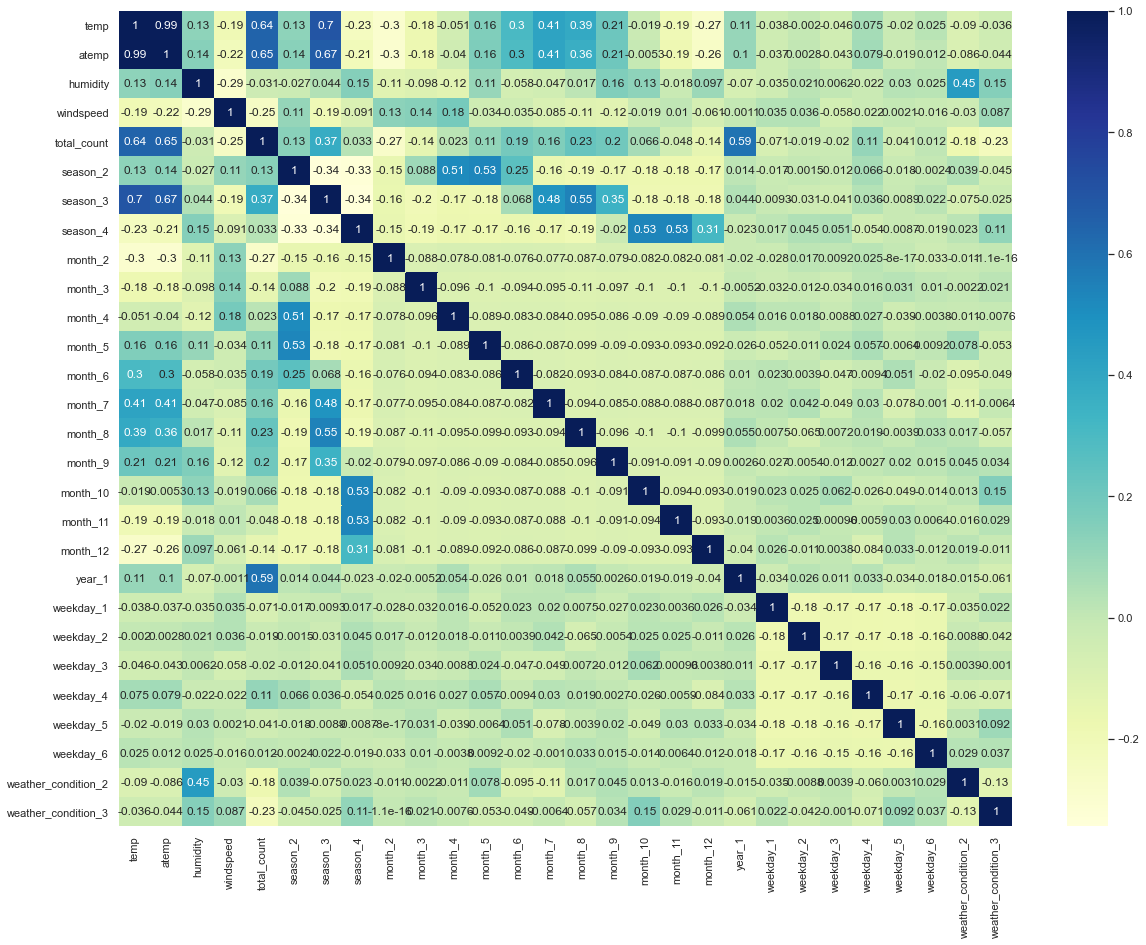

In [297]:
plt.figure(figsize=[20,15])
sns.heatmap(bike_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [298]:
# Temperature has higher correlation as total_count 

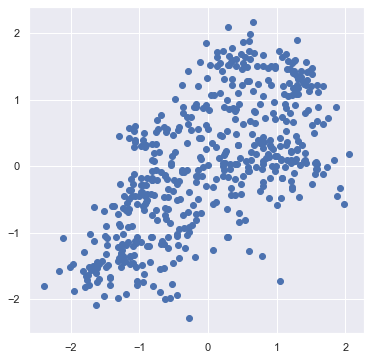

In [299]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.total_count)
plt.show()

###  TASK 7: Feature selection
    R-squared score,Adjusted r2 score
    p-value>0.05 drop it
    VIF>5 DROP IT (if very important to dataset then keep it)--manual feature selection


In [300]:
y_train = bike_train.pop('total_count')
X_train = bike_train


In [301]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [302]:
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const                 -0.966092
holiday               -0.585718
workingday            -0.256518
temp                   0.392970
atemp                  0.003357
humidity              -0.057567
windspeed             -0.129328
season_2               0.370725
season_3               0.216666
season_4               0.689965
month_2                0.131895
month_3                0.314387
month_4                0.329374
month_5                0.416730
month_6                0.355413
month_7                0.173067
month_8                0.403259
month_9                0.681280
month_10               0.312955
month_11               0.099261
month_12               0.080999
year_1                 1.038353
weekday_1              0.094133
weekday_2              0.078996
weekday_3              0.151506
weekday_4              0.228824
weekday_5              0.200839
weekday_6             -0.022873
weather_condition_2   -0.316321
weather_condition_3   -1.236295
dtype: float64

In [303]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     92.19
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.89e-176
Time:                        20:57:57   Log-Likelihood:                -243.63
No. Observations:                 510   AIC:                             547.3
Df Residuals:                     480   BIC:                             674.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9661      0.407     -2.372      0.018      -1.766      -0.166
holiday                -0.5857      0.295     -1.988      0.047      -1.164      -0.007
workingday             -0.2565      0.320     -0.801      0.423      -0.886       0.373
temp                    0.3930      0.146      2.694      0.007       0.106       0.680
atemp                   0.0034      0.016      0.204      0.838      -0.029       0.036
humidity               -0.0576      0.023     -2.482      0.013      -0.103      -0.012
windspeed              -0.1293      0.020     -6.335      0.000      -0.169      -0.089
season_2                0.3707      0.107      3.455      0.001       0.160       0.582
season_3                0.2167      0.136      1.588      0.113      -0.051       0.485
season_4                0.6900      0.118      5.835      0.000       0.458       0.922
month_2                 0.1319      0.093      1.411      0.159      -0.052       0.316
month_3                 0.3144      0.101      3.104      0.002       0.115       0.513
month_4                 0.3294      0.152      2.168      0.031       0.031       0.628
month_5                 0.4167      0.164      2.535      0.012       0.094       0.740
month_6                 0.3554      0.177      2.007      0.045       0.007       0.703
month_7                 0.1731      0.201      0.863      0.389      -0.221       0.567
month_8                 0.4033      0.192      2.104      0.036       0.027       0.780
month_9                 0.6813      0.171      3.994      0.000       0.346       1.016
month_10                0.3130      0.157      1.999      0.046       0.005       0.621
month_11                0.0993      0.150      0.663      0.507      -0.195       0.393
month_12                0.0810      0.121      0.671      0.503      -0.156       0.318
year_1                  1.0384      0.037     28.394      0.000       0.966       1.110
weekday_1               0.0941      0.322      0.292      0.770      -0.539       0.728
weekday_2               0.0790      0.321      0.246      0.806      -0.551       0.709
weekday_3               0.1515      0.318      0.476      0.634      -0.474       0.777
weekday_4               0.2288      0.323      0.708      0.479      -0.406       0.864
weekday_5               0.2008      0.322      0.623      0.533      -0.432       0.834
weekday_6              -0.0229      0.070     -0.329      0.743      -0.160       0.114
weather_condition_2    -0.3163      0.045     -6.999      0.000      -0.405      -0.228
weather_condition_3    -1.2363      0.114    -10.825      0.000      -1.461      -1.012
==============================================================================
Omnibus:                       87.859   Durbin-Watson:                   1.996
Prob(Omnibus):       

# p value is higher correlation: atemp(0.838),month_7,month_11,month_12,weekdays_1,weekdays_2,weekdays_3,weekdays_4,weekdays_5,weekdays_6

In [304]:
X_train=X_train.drop('atemp', 1)

In [305]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [306]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.67
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.09e-177
Time:                        20:57:58   Log-Likelihood:                -243.66
No. Observations:                 510   AIC:                             545.3
Df Residuals:                     481   BIC:                             668.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8858    

In [307]:
X_train=X_train.drop('workingday', 1)

In [308]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()


In [309]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.26
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.30e-178
Time:                        20:57:58   Log-Likelihood:                -243.99
No. Observations:                 510   AIC:                             544.0
Df Residuals:                     482   BIC:                             662.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8867    

In [310]:
X_train=X_train.drop('season_3', 1)

In [311]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.75e-178
Time:                        20:57:59   Log-Likelihood:                -245.30
No. Observations:                 510   AIC:                             544.6
Df Residuals:                     483   BIC:                             658.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8725    

In [312]:
X_train=X_train.drop('month_2', 1)

In [313]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.88e-179
Time:                        20:57:59   Log-Likelihood:                -246.32
No. Observations:                 510   AIC:                             544.6
Df Residuals:                     484   BIC:                             654.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8021    

In [314]:
X_train=X_train.drop('month_7', 1)

In [315]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.43e-179
Time:                        20:57:59   Log-Likelihood:                -248.09
No. Observations:                 510   AIC:                             546.2
Df Residuals:                     485   BIC:                             652.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6821    

In [316]:
X_train=X_train.drop('month_4', 1)

In [317]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.90e-179
Time:                        20:58:00   Log-Likelihood:                -249.99
No. Observations:                 510   AIC:                             548.0
Df Residuals:                     486   BIC:                             649.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6605    

In [318]:
X_train=X_train.drop('month_5', 1)

In [319]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.02e-180
Time:                        20:58:00   Log-Likelihood:                -250.59
No. Observations:                 510   AIC:                             547.2
Df Residuals:                     487   BIC:                             644.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6518    

In [320]:
X_train=X_train.drop('month_6', 1)

In [321]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.99e-181
Time:                        20:58:00   Log-Likelihood:                -250.71
No. Observations:                 510   AIC:                             545.4
Df Residuals:                     488   BIC:                             638.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6467    

In [322]:
X_train=X_train.drop('month_10', 1)

In [323]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     131.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          7.17e-182
Time:                        20:58:00   Log-Likelihood:                -251.79
No. Observations:                 510   AIC:                             545.6
Df Residuals:                     489   BIC:                             634.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6323    

In [324]:
X_train=X_train.drop('month_12', 1)

In [325]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.19e-182
Time:                        20:58:01   Log-Likelihood:                -252.50
No. Observations:                 510   AIC:                             545.0
Df Residuals:                     490   BIC:                             629.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6440    

In [326]:
X_train=X_train.drop('month_11', 1)

In [327]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.69e-183
Time:                        20:58:01   Log-Likelihood:                -253.08
No. Observations:                 510   AIC:                             544.2
Df Residuals:                     491   BIC:                             624.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6415    

In [328]:
X_train=X_train.drop('weekday_3', 1)

In [329]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.12e-184
Time:                        20:58:01   Log-Likelihood:                -253.96
No. Observations:                 510   AIC:                             543.9
Df Residuals:                     492   BIC:                             620.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6848    

In [330]:
X_train=X_train.drop('weekday_4', 1)

In [331]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_13 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.54e-185
Time:                        20:58:01   Log-Likelihood:                -254.02
No. Observations:                 510   AIC:                             542.0
Df Residuals:                     493   BIC:                             614.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6773    

In [332]:
X_train=X_train.drop('weekday_5', 1)

In [333]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_14 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.02e-186
Time:                        20:58:02   Log-Likelihood:                -254.09
No. Observations:                 510   AIC:                             540.2
Df Residuals:                     494   BIC:                             607.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6830    

In [334]:
X_train=X_train.drop('weekday_6', 1)

In [335]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_15 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.49e-187
Time:                        20:58:02   Log-Likelihood:                -254.12
No. Observations:                 510   AIC:                             538.2
Df Residuals:                     495   BIC:                             601.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6806    

In [336]:
X_train=X_train.drop('month_3', 1)

In [337]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_16 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.76e-188
Time:                        20:58:02   Log-Likelihood:                -255.46
No. Observations:                 510   AIC:                             538.9
Df Residuals:                     496   BIC:                             598.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6643    

In [338]:
#Now model is correct 

In [339]:
# Check for VIF value probably less than 5 .

# Task 8 : CHECK FOR VIF 

In [340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weather_condition_2,1.88
8,year_1,1.69
2,humidity,1.51
1,temp,1.49
5,season_4,1.42
4,season_2,1.41
6,month_8,1.41
7,month_9,1.21
3,windspeed,1.19
10,weekday_2,1.17


# TASK :9  Model Validation

Validating the assumption of Linear Regression Model:

    1.Linear Relationship
    2.Homoscedasticity
    3.Absence of Multicollinearity
    4.Independence of residuals
    5.Normality of Errors

# Linear Relationship

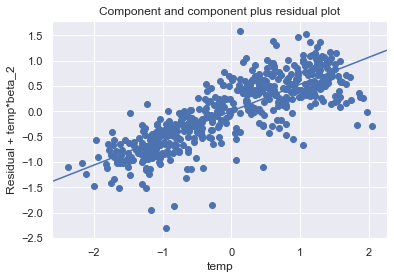

In [341]:
sm.graphics.plot_ccpr(lr_16, 'temp')
plt.show()

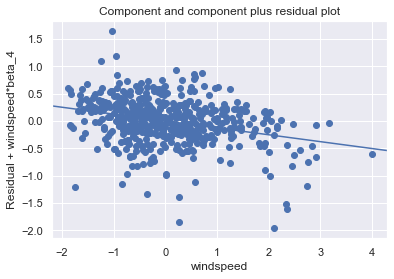

In [342]:
sm.graphics.plot_ccpr(lr_16, 'windspeed')
plt.show()

# Insight: The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved

# TASK 9: Residual Analysis of the train data¶
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [343]:
y_train_price = lr_16.predict(X_train_lm)

In [344]:
y_train_price.shape

(510,)

In [345]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

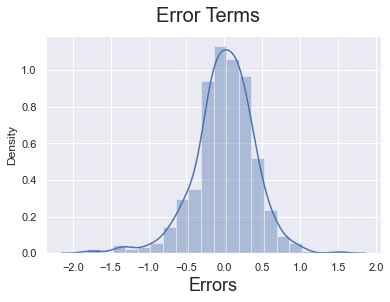

In [346]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Homoscedasticity

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


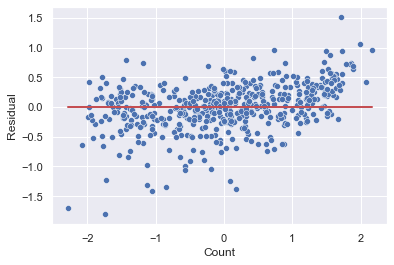

In [347]:
y_train_price = lr_16.predict(X_train_lm)
residual = y_train - y_train_price
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

 # Insight: There is no visible pattern in residual values, thus homoscedacity is well preserved

# Validating Multi Colinearity

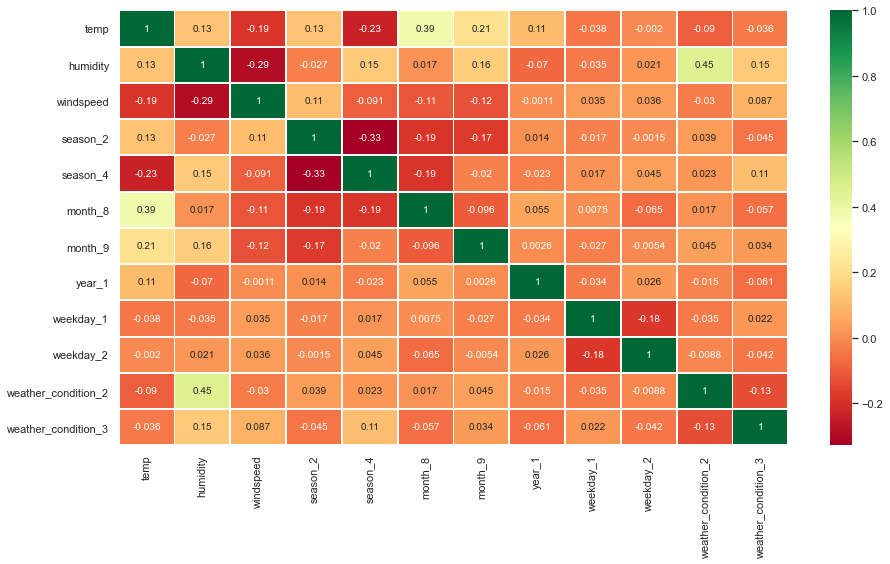

In [348]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [349]:
# Run the function to calculate VIF for the final model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weather_condition_2,1.88
8,year_1,1.69
2,humidity,1.51
1,temp,1.49
5,season_4,1.42
4,season_2,1.41
6,month_8,1.41
7,month_9,1.21
3,windspeed,1.19
10,weekday_2,1.17


# Independence of residuals
Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

In [350]:
print('The Durbin-Watson value for Final Model lr_16 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_price)),4))

The Durbin-Watson value for Final Model lr_16 is 2.0395


- ### Insight: There is almost no autocorrelation.
    0 – 2: positive auto-correlation
    2 – 4: negative auto-correlation)

# NORMALITY OF ERROR

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


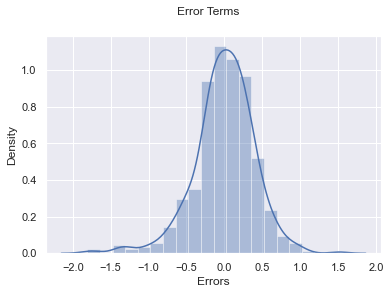

In [351]:
res = y_train - y_train_price

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

 # Insight: Based on the histogram, we can conclude that error terms are following a normal distribution

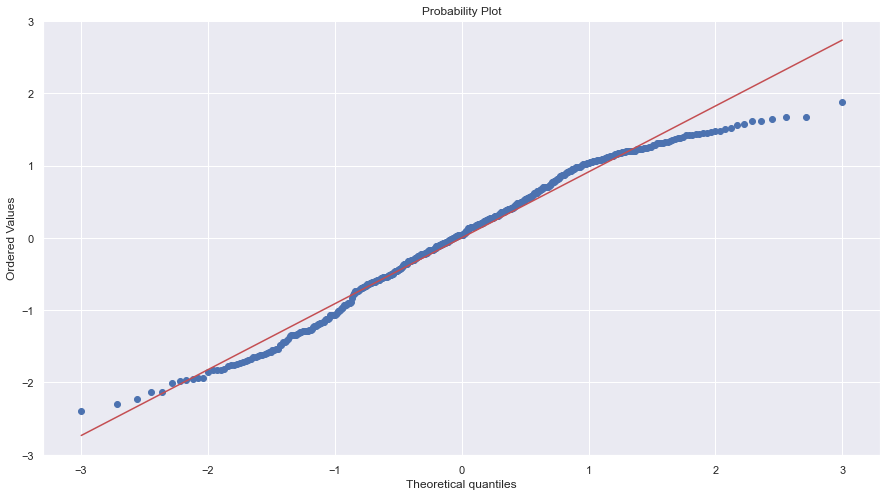

In [352]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(y_train_price.tolist(),dist='norm',plot=plt)
plt.show()

## TASK 10 : Making Predictions

#### Applying the scaling on the test sets

In [353]:
num_columns=['total_count','temp','humidity','windspeed']
bike_test[num_columns] = scaler.transform(bike_test[num_columns])

<ipython-input-353-e416a2988771>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_test[num_columns] = scaler.transform(bike_test[num_columns])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


#### Dividing into X_test and y_test

In [354]:
y_test = bike_test.pop('total_count')
X_test = bike_test

In [355]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [356]:
X_test_m4.columns

Index(['const', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_2', 'season_3', 'season_4', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'year_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_condition_2', 'weather_condition_3'],
      dtype='object')

In [357]:
X_train.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'season_2', 'season_4',
       'month_8', 'month_9', 'year_1', 'weekday_1', 'weekday_2',
       'weather_condition_2', 'weather_condition_3'],
      dtype='object')

In [358]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['workingday', 'atemp','season_3','month_2', 'month_3', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_4', 'month_5', 'month_6', 'month_7','month_10', 'month_11', 'month_12']
X_test_m = X_test_m4.drop(drop_cols, axis = 1)

In [359]:
X_test_m

,const,holiday,temp,humidity,windspeed,season_2,season_4,month_8,month_9,year_1,weekday_1,weekday_2,weather_condition_2,weather_condition_3
instant,,,,,,,,,,,,,,
185,1.0,1,1.305371,0.080741,-1.394498,0,0,0,0,0,0,0,1,0
536,1.0,0,1.613721,-0.238955,-0.984730,1,0,0,0,1,0,0,0,0
300,1.0,0,-0.112129,1.301379,0.079219,0,1,0,0,0,0,0,1,0
222,1.0,0,1.526280,-1.410181,0.110839,0,0,1,0,0,0,0,0,0
153,1.0,0,1.240938,-2.241380,1.277165,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.0,0,-1.239685,0.429495,-0.196644,0,0,0,0,1,0,1,1,0
703,1.0,0,-0.079915,0.749183,-0.220305,0,1,0,0,1,0,0,0,0
128,1.0,0,0.210028,0.037147,-1.481206,1,0,0,0,0,0,1,0,0


In [360]:
y_pred_m = lr_16.predict(X_test_m)

# TASK 11: MODEL EVALUATION

Text(0, 0.5, 'y_pred_m')

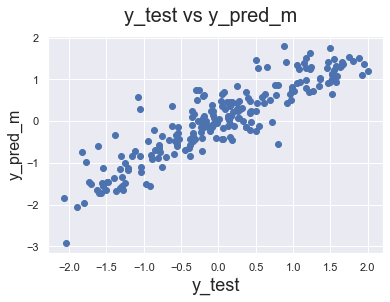

In [361]:
# Plotting y_test and y_pred_m to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m)
fig.suptitle('y_test vs y_pred_m', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_m', fontsize=16)   

In [362]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_price))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8405552394441898
Test R-Score:  0.8046707161006954


# REPORT THE MODEL

- ### Significant variables to predict the demand for shared bikes
    holiday
    temp
    humidity
    windspeed
    Season(Spring,Summer,Winter)
    months(January, July, September, November, December)
    Year (2019)
    Monday and Tuesday
    weathercondition( Light Snow, Mist Cloudy)

- ### Q.) Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
Answer : The Top 3 features contributing significantly towards the demands of share bikes are:
weathercondition_Light_Snow(negative correlation),
year_1(Positive correlation),
temp(Positive correlation).